In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [103]:
data=pd.read_csv('G:\\Downloads\\Iris.csv')
data.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [104]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
Sepal.Length    146 non-null float64
Sepal.Width     145 non-null float64
Petal.Length    148 non-null float64
Petal.Width     150 non-null float64
Species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [105]:
iv=data[['Sepal.Length','Sepal.Width','Petal.Length','Petal.Width']]
dv=data[['Species']]




In [106]:
# from sklearn.preprocessing import Imputer
# imputer=Imputer(missing_values="NaN",strategy="mean",axis=0)
# iv=imputer.fit_transform(iv)

iv=iv.fillna(data.mean())

In [107]:
dv['Species']=pd.get_dummies(dv['Species'])

C:\Users\Vijay\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


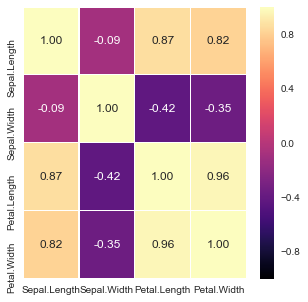

In [108]:
import seaborn as sns
fig,ax = plt.subplots(figsize=(5, 5))
sns.heatmap(data.corr(), ax=ax, annot=True, linewidths=0.05, fmt= '.2f',cmap="magma")
plt.show()

In [109]:
from sklearn.model_selection import train_test_split
iv_train,iv_test,dv_train,dv_test=train_test_split(iv,dv,test_size=0.3,random_state=0)


In [110]:
# from sklearn.preprocessing import LabelEncoder
# lbl=LabelEncoder()
# data['Species'] = lbl.fit_transform(data['Species'])


from sklearn.preprocessing import StandardScaler
SC=StandardScaler()
iv_train=SC.fit_transform(iv_train)
iv_test=SC.fit_transform(iv_test)

In [111]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(iv_train,dv_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [112]:
y_pred_lr=lr.predict(iv_test)
r2_score(dv_test,y_pred_lr)

0.9176738499168648

In [113]:
dv.shape

(150, 1)

In [114]:
iv=pd.DataFrame(iv)

In [115]:
from sklearn import tree
# print(iv_train.shape)
# print(iv_test.shape)
# print(dv_train.shape)
# print(dv_test.shape)

clf=tree.DecisionTreeClassifier()
clf.fit(iv_train,dv_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [134]:
y_pred_clf=clf.predict(iv_test)

In [116]:
#clf.predict(iv_test)

In [117]:
# from sklearn import linear_model
# lm=linear_model.SGDClassifier(max_iter=1000, tol=1e-3)
from sklearn.ensemble import RandomForestClassifier
clfRF = RandomForestClassifier(n_estimators=10, max_depth=10,random_state=0)
clfRF.fit(iv_train,dv_train)

C:\Users\Vijay\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=0,
            verbose=0, warm_start=False)

In [118]:
y_pred_RF=clfRF.predict(iv_test)

In [131]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
#accuracy_score(y_pred,dv_test)
# accuracy_score(dv_test,y_pred)
# r2_score(dv_test,y_pred)

In [132]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(dv_test,y_pred)
print(cm)

[[29  0]
 [ 0 16]]


In [135]:
from sklearn.metrics import r2_score
r2_lr=r2_score(dv_test,y_pred_lr)
r2_RF=r2_score(dv_test,y_pred_RF)
r2_clf=r2_score(dv_test,y_pred_clf)


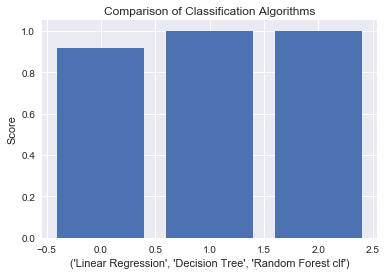

In [176]:
%matplotlib inline
import numpy as np
# y=np.array([lr.score(dv_test,y_pred_lr),clf.score(dv_test,y_pred),clfRF.score(dv_test,y_pred_RF)])
y=[r2_lr,r2_clf,r2_RF]

y_pos = np.arange(len(x))

x=('Linear Regression','Decision Tree','Random Forest clf')
plt.bar(y_pos,y)
plt.title("Comparison of Classification Algorithms")
plt.xlabel(x)
plt.ylabel("Score")
plt.show()

In [183]:
#Testing the results of Prediction
y_pred_test=clf.predict(['5.1','3.3','1.7','0.5'])
print(y_pred_test)
# 0 -> Setosa

[0]


C:\Users\Vijay\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
